In [1]:
import pandas as pd 
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import statistics 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
import re

In [2]:
#creates X -- the array of genres, and y -- the score associated to each review
df_genres = pd.read_csv("genres.csv")

X = np.array(df_genres.drop(["reviewid", "score"], axis = 1))
y = np.array(df_genres["score"])

#used in last cell
X_yrs = np.copy(X)

In [3]:
#gives the set of unique genres
genres = []
for i in range(X.shape[0]):
    if isinstance(X[i][1], str):
        genres.append(X[i][1])
unique_genres = set(genres)
print(unique_genres)

{'folk/country', 'experimental', 'metal', 'rap', 'electronic', 'jazz', 'global', 'pop/r&b', 'rock'}


global size: 219 , mean: 7.429680365296804 , stdev: 1.0060757573240175
folk/country size: 685 , mean: 7.2021897810218976 , stdev: 1.0644348329691724
experimental size: 1815 , mean: 7.336694214876033 , stdev: 1.1064549918554278
pop/r&b size: 1432 , mean: 6.883798882681564 , stdev: 1.295232383812657
jazz size: 435 , mean: 7.303908045977011 , stdev: 1.2511039883565462
metal size: 862 , mean: 6.95 , stdev: 1.387799417840329
rap size: 1559 , mean: 6.9005131494547784 , stdev: 1.3027027275356824
electronic size: 3874 , mean: 6.920702116675271 , stdev: 1.310055618783959
rock size: 9438 , mean: 6.942011019283747 , stdev: 1.360346582338916


[Text(-2.5, 0, ''),
 Text(0.0, 0, ''),
 Text(2.5, 0, ''),
 Text(5.0, 0, ''),
 Text(7.5, 0, ''),
 Text(10.0, 0, ''),
 Text(12.5, 0, '')]

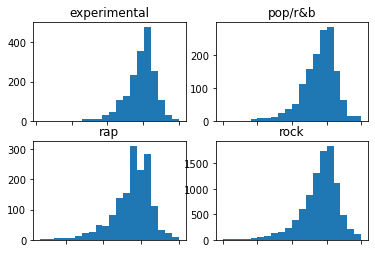

In [4]:
#creates a dictionary of scores associated to each genre
score_by_genre = {'global': [], 'folk/country': [], 'experimental': [], 'pop/r&b': [], 'jazz': [], 'metal': [], 'rap': [], 'electronic': [], 'rock': []}

X_genre = np.array([X[i][1] for i in range(X.shape[0]) if isinstance(X[i][1], str)])
y_genre = np.array([y[i] for i in range(len(y)) if isinstance(X[i][1], str)])

for i in range(len(X_genre)):
    score_by_genre[X_genre[i]].append(y_genre[i])

#average score and standard deviation for each genre
for i in score_by_genre.keys():
    print(i, "size:", len(score_by_genre[i]), ", mean:", statistics.mean(score_by_genre[i]), ", stdev:", statistics.stdev(score_by_genre[i]))

#plots distribution of scores for a few genres
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(score_by_genre['experimental'], bins=20)
axs[0, 0].set_title('experimental')
axs[0,0].set_xticklabels([])
axs[0, 1].hist(score_by_genre['pop/r&b'], bins=20)
axs[0, 1].set_title('pop/r&b')
axs[0,1].set_xticklabels([])
axs[1, 0].hist(score_by_genre['rap'], bins=20)
axs[1, 0].set_title('rap')
axs[1,0].set_xticklabels([])
axs[1, 1].hist(score_by_genre['rock'], bins=20)
axs[1, 1].set_title('rock')
axs[1,1].set_xticklabels([])

Rap appears to have scores concentrated around a slightly lower score than the other genres. Pop/r&b has significantly more scores near 6 than the other genres.

The r-squared value is 0.00019101892686312905


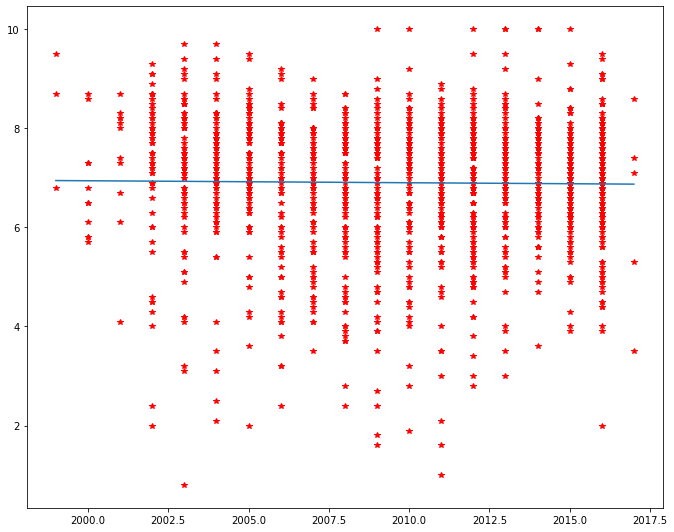

In [5]:
#X_yrs defined above for the genre analysis

#trend for rap reviews
X_rap = np.array([[i[0]] for i in X_yrs if i[1] == 'rap'])
y_rap = np.array([y[i] for i in range(X_yrs.shape[0]) if X_yrs[i][1] == 'rap'])

#performs and plots a linear regression
reg = LinearRegression().fit(X_rap,y_rap)

plt.rcParams["figure.figsize"] = [9.50, 7.50]
plt.rcParams["figure.autolayout"] = True
print("The r-squared value is", reg.score(X_rap,y_rap))

plt.plot(X_rap, y_rap, 'r*')
plt.plot(X_rap, reg.coef_ * X_rap + reg.intercept_, linestyle='solid')
plt.show()

